<a href="https://colab.research.google.com/github/EduardoRodrigue/Programas-de-tesis/blob/main/Minimo_Depillis_SIN_INMUNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mínimo dosis

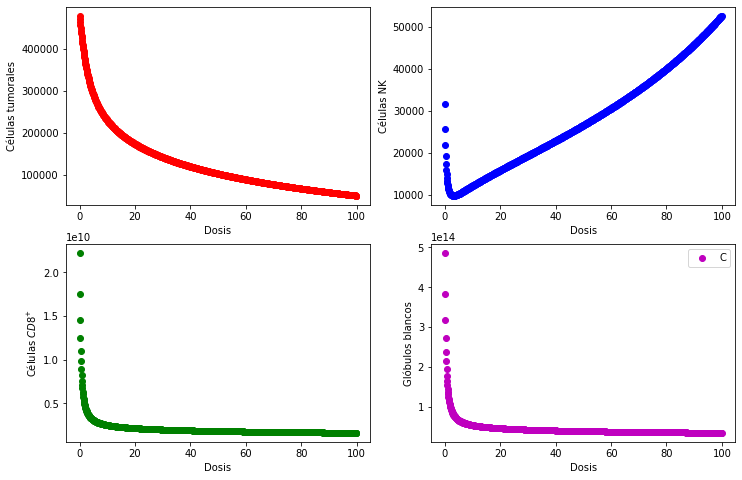

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
from scipy.integrate import odeint
 
 
 
#### PARÁMETROS PACIENTE 9 #########
a, b, c, d, e, l, f, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
 
kt = 9.00e-1
kn = kl = kc = 6e-1
vi =  1

 
#D = d ((L/T)**l)/(s + (L/T)**l)
#################################### CASO CON TRATAMIENTO
def dP_dt(P, t, dosis):
    T=P[0]
    N=P[1]
    L=P[2]
    C=P[3]
    M=P[4]
    vm = 0
 
    tau = 1.0; fs = 100; t0 = 0 
    
    if t <= 365:  ######################### Condición para cortar el tratamiento
      if np.mod(t-t0, 15) <= tau and np.mod(t-t0,1) >=0:
        vm = dosis
    
    return [a*T*(1 - b*T) - c*N*T - (d*((L/T)**l)/(s + (L/T)**l))*T - kt*(1 - np.exp(-M))*T,  
            e*C - f*N + g*N*(T**2/(h + T**2)) - p*N*T - kn*N*(1 - np.exp(-M)),  
            -m*L + j*L*(((d*((L/T)**l)/(s + (L/T)**l))*T)**2/(k + ((d*((L/T)**l)/(s + (L/T)**l))*T)**2)) - q*L*T + (r1*N + r2*C)*T - u*N*L**2 - kl*L*(1 - np.exp(-M)) ,  
            alpha - beta*C - kc*C*(1 - np.exp(-M)),  
            -gamma*M + vm] 


def depillismodel(dosis):
  ts = np.linspace(0, 365., 10000)
  P0 = [2e7, 1e3, 10, 6e8, 0] ###1e6, 5e4, 100, 1.1e7,10,10] #condición inicial
  sol = odeint(dP_dt, P0, ts, args=(dosis,))
  Tumorales = sol[:,0]
  NK = sol[:,1]
  L = sol[:,2]
  C = sol[:,3]
  M = sol[:,4]


  tumoralesTotales = np.sum(Tumorales)
  NKTotales=np.sum(NK)
  LTotales=np.sum(L)
  CTotales=np.sum(C)
  #print('tumoralesTotales', tumoralesTotales)
 
  marcador=1

  if marcador==0:
#plt.yscale('log')
    fig,ax=plt.subplots(1,2,figsize=(12,6))
#plt.ylim(1, 10e12)
    ax[0].grid()
    ax[0].semilogy(ts, Tumorales, "r-+", label="Tumorales")
    ax[0].semilogy(ts, NK, "b-x", label="NK cells")
    ax[0].semilogy(ts, L, "g-", label="CD8 cells")
    ax[0].semilogy(ts, C, "c-o", label="Glóbulos blancos")
 
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Population")
    ax[0].legend(loc=4);
 
#plt.xlim(0, 20)
    ax[1].plot(ts, M, "g--", label="Concentración de Quimio")
    ax[1].plot(ts, 2*P, "y-", label="Dosis de Quimio")
    ax[1].set_ylabel("Concetración de Quimioterapia")
    ax[1].set_xlabel("Tiempo")
    ax[1].legend(loc=1);
  return [tumoralesTotales,NKTotales,LTotales,CTotales]

################################
indicador_de_dosis = 0
npuntos = 1000
deltaD=0.1
lista = np.zeros(npuntos)
dosis1=np.zeros(npuntos)
Tumorales=np.zeros(npuntos)
Nk=np.zeros(npuntos)
L=np.zeros(npuntos)
C=np.zeros(npuntos)
for i in range(0,npuntos):
  dosis= i*deltaD
  dosis1[i] =i*deltaD 
  
  lista = depillismodel(dosis)
  #print(np.shape(lista))
  Tumorales[i]=lista[0]
  Nk[i]=lista[1]
  L[i]=lista[2]
  C[i]=lista[3]
min=np.min(lista)

#print('El mínimo es:', min, 'con dosis', indicador_de_dosis)
#print('lista', lista)
# Gráfica
fig,ax=plt.subplots(2,2,figsize=(12,8))
ax[0][0].plot(dosis1,Tumorales/2e7,'or', label = 'Tumorales')
ax[0][0].set_xlabel('Dosis')
ax[0][0].set_ylabel('Células tumorales')
#ax[0][0].set_ylim(0,0.02e13)

ax[0][1].plot(dosis1,Nk,'ob', label = 'NK')
ax[0][1].set_xlabel('Dosis')
ax[0][1].set_ylabel('Células NK')

ax[1][0].plot(dosis1,L,'og', label = 'L')
ax[1][0].set_xlabel('Dosis')
ax[1][0].set_ylabel('Células $CD8^{+}$')

ax[1][1].plot(dosis1,C,'om', label = 'C')
ax[1][1].set_xlabel('Dosis')
ax[1][1].set_ylabel('Glóbulos blancos')


plt.legend()
plt.show()

# Gráfica Depillis

(-0.5, 40.0)

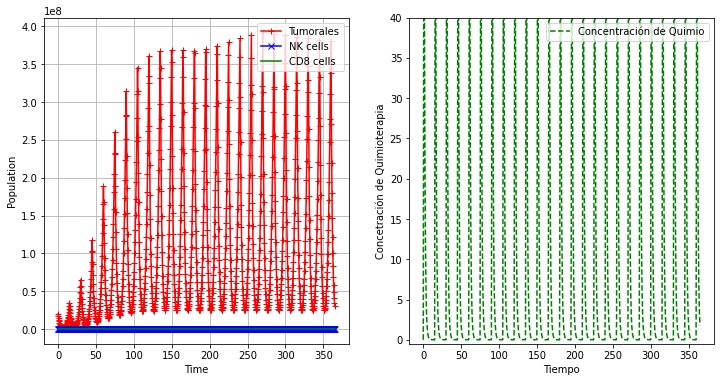

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
from scipy.integrate import odeint
 
 
 
#### PARÁMETROS PACIENTE 9 #########
a, b, c, d, e, l, f, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
 
kt = 9.00e-1
kn = kl = kc = 6e-1

 
#D = d ((L/T)**l)/(s + (L/T)**l)
#################################### CASO CON TRATAMIENTO
def dP_dt(P, t):
    T=P[0]
    N=P[1]
    L=P[2]
    C=P[3]
    M=P[4]
    vm = 0
 
    tau = 1.0; fs = 100; t0 = 0 
    
    if t <= 365:  ######################### Condición para cortar el tratamiento
      if np.mod(t-t0,15) <= tau and np.mod(t-t0,1) >=0:
        vm = 100
    
    return [a*T*(1 - b*T) - c*N*T - (d*((L/T)**l)/(s + (L/T)**l))*T - kt*(1 - np.exp(-M))*T,  
            e*C - f*N + g*N*(T**2/(h + T**2)) - p*N*T - kn*N*(1 - np.exp(-M)),  
            -m*L + j*L*(((d*((L/T)**l)/(s + (L/T)**l))*T)**2/(k + ((d*((L/T)**l)/(s + (L/T)**l))*T)**2)) - q*L*T + (r1*N + r2*C)*T - u*N*L**2 - kl*L*(1 - np.exp(-M)),  
            alpha - beta*C - kc*C*(1 - np.exp(-M)),  
            -gamma*M + vm] 
 
 
ts = np.linspace(0, 365., 1000)
P0 = [2e7, 1e3, 10, 6e8, 0] ###1e6, 5e4, 100, 1.1e7,10,10] #condición inicial
sol = odeint(dP_dt, P0, ts)
Tumorales = sol[:,0]
NK = sol[:,1]
L = sol[:,2]
C = sol[:,3]
M = sol[:,4]
 
######################################## Para graficar pulsos #####################
ts = np.linspace(0, 365., 1000)
 
def pulse_train(Np,fs, tau, t0):
  x = np.zeros_like(ts)
  for k,tk in enumerate(ts):
    if np.mod(tk-t0,3) <= tau and np.mod(tk-t0,1) >=0:
      x[k] = 1
  return ts,x
 
tau = 1.0; fs = 10000; t0 = 0 
 
ts,P = pulse_train(50, fs, tau, 0)
 
###################################################################################
 
#plt.yscale('log')
fig,ax=plt.subplots(1,2,figsize=(12,6))
plt.ylim(0, 10e12)
ax[0].grid()
ax[0].plot(ts, Tumorales, "r-+", label="Tumorales")
ax[0].plot(ts, NK, "b-x", label="NK cells")
ax[0].plot(ts, L, "g-", label="CD8 cells")
#ax[0].plot(ts, C, "c-o", label="Glóbulos blancos")
#ax[0].set_xlim(30,60)
#ax[0].set_ylim(0,0.2e6)


 
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Population")
ax[0].legend(loc=1);
 
#plt.xlim(0, 120)
ax[1].plot(ts, M, "g--", label="Concentración de Quimio")
#ax[1].plot(ts, 2*P, "y-", label="Dosis de Quimio")
ax[1].set_ylabel("Concetración de Quimioterapia")
ax[1].set_xlabel("Tiempo")
ax[1].legend(loc=1);
ax[1].set_ylim(-0.5, 40)